# Apply logistic regression to categorize whether a county had high mortality rate due to contamination

## 1. Import the necessary packages to read in the data, plot, and create a logistic regression model

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression

## 2. Read in the hanford.csv file in the `data/` folder 

In [24]:
df = pd.read_csv('hanford.csv')

<img src="../../images/hanford_variables.png"></img>

## 3. Calculate the basic descriptive statistics on the data

In [25]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


In [26]:
iqr = df.quantile(q=0.75) - df.quantile(q=0.25)
iqr

Exposure      3.92
Mortality    47.80
dtype: float64

In [27]:
ual = df.quantile(q=0.75) + (iqr * 1.5)
ual

Exposure      12.29
Mortality    249.60
dtype: float64

In [28]:
lal = df.quantile(q=0.25) - (iqr * 1.5)
lal

Exposure     -3.39
Mortality    58.40
dtype: float64

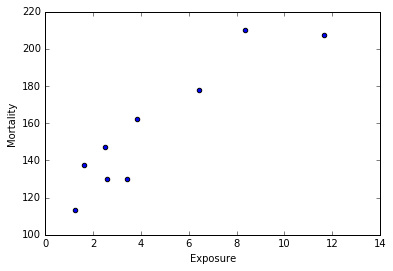

In [29]:
df.plot(kind='scatter', x='Exposure', y='Mortality')

## 4. Find a reasonable threshold to say exposure is high and recode the data 

In [30]:
for value in df['Exposure']:
    if value < ual['Exposure']:
        print(value)

2.49
2.57
3.41
1.25
1.62
3.83
11.64
6.41
8.34


In [31]:
# Find new reasonable threshold!
# Choosing 6

In [32]:
df['high_exposure'] = df['Exposure'].apply(lambda x:1 if x>6 else 0)

In [33]:
df

,County,Exposure,Mortality,high_exposure
0,Umatilla,2.49,147.1,0
1,Morrow,2.57,130.1,0
2,Gilliam,3.41,129.9,0
3,Sherman,1.25,113.5,0
4,Wasco,1.62,137.5,0
5,HoodRiver,3.83,162.3,0
6,Portland,11.64,207.5,1
7,Columbia,6.41,177.9,1
8,Clatsop,8.34,210.3,1


In [34]:
# dataset = df[['Mortality']].join([pd.get_dummies(df['Exposure'],prefix="Exposure"),df.high_exposure])

In [35]:
# dataset

## 5. Create a logistic regression model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lm = LogisticRegression()

In [43]:
x = np.asarray(df[['Mortality']])
y = np.asarray(df['high_exposure'])

In [46]:
lm = lm.fit(x,y)

In [50]:
lm.score(x,y)

0.66666666666666663

In [47]:
lm.coef_

array([[ 0.00259684]])

In [48]:
lm.intercept_

array([-0.74701648])

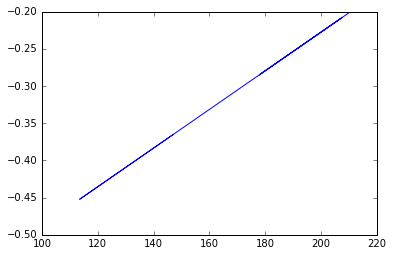

In [58]:
plt.plot(x,lm.coef_[0]*x+lm.intercept_[0])

## 6. Predict whether the mortality rate (Cancer per 100,000 man years) will be high at an exposure level of 50

In [60]:
df['high_mortality'] = df['Mortality'].apply(lambda x:1 if x>150 else 0)

In [61]:
lm2 = LogisticRegression()

In [65]:
x2 = np.asarray(df[['Exposure']])
y2 = np.asarray(df['high_mortality'])

In [67]:
lm2 = lm2.fit(x2,y2)

In [68]:
lm2.predict(50)

array([1])

In [69]:
# According to the prediction the mortality rate is high at an exposure level of 50.